# Pymaceuticals Inc.
---

### Analysis

After much analysis, we can concur that the Capomulin drug regimen showed the best results, and we even have more data/proof to show for it, as it was tested more than other drugs. Do note that Ramicane did have outliers  with smaller tumor volumes, but when we look at the data as a whole, Capomulin had more meaningful success in decreasing tumor size. What we can note from the data as well is that Infubinol data could be thrown off by outlier data that throws off the averages of tumor volume, as seen in the box plots. By getting rid of outliers, if it makes sense, we can get more normalized data. For a study of this type, it would not be wise to do so, as this is vital information with people's lives on the line. We need to be as accurate and truthful as possible. If this was data on predicting business outcomes, or forecasting of some sort for a business, it would make sense to normalize and adjust for outliers. In conclusion, Capomulin showed the most success in the trial for drugs fighting against squamous cell carcinoma.

 

In [470]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
merged_mouse_data = pd.merge(study_results, mouse_metadata, how="left", on="Mouse ID")
# Display the data table for preview
merged_mouse_data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [451]:
# Checking the number of mice.

merged_mouse_data["Mouse ID"].nunique()



249

In [452]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
    
duplicate_timepoints = merged_mouse_data.duplicated(subset=['Mouse ID', 'Timepoint'])

duplicate_mouse_ids = merged_mouse_data.loc[duplicate_timepoints,'Mouse ID'].unique()
duplicate_mouse_ids


array(['g989'], dtype=object)

In [453]:
# Optional: Get all the data for the duplicate mouse ID. 
merged_mouse_data.loc[merged_mouse_data["Mouse ID"]=='g989']
#make a dataframe dropping the duplicates and keeping whats left from Mouse ID g989 to concat with larger df later
#as we dont want to get rid of all of this mouse ID. I believe the directions may have been mistaken/wrong
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
dupe_df =merged_mouse_data.loc[merged_mouse_data["Mouse ID"]=='g989']
nondupe_df = dupe_df.drop([137, 360, 681, 869, 1111,])
nondupe_df


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1195,g989,25,56.045564,1,Propriva,Female,21,26
1380,g989,30,59.082294,1,Propriva,Female,21,26
1592,g989,35,62.570880,2,Propriva,Female,21,26


In [454]:
big_mousedata = merged_mouse_data[merged_mouse_data["Mouse ID"].isin(duplicate_mouse_ids)==False]
big_mousedata


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [455]:
#concatenating to make one final dataframe where dupes were dropped buy the mouse g989 is still present
final_df = pd.concat([big_mousedata,nondupe_df])
final_df.reset_index(drop=True, inplace=True)
final_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1883,g989,15,51.325852,1,Propriva,Female,21,26
1884,g989,20,55.326122,1,Propriva,Female,21,26
1885,g989,25,56.045564,1,Propriva,Female,21,26
1886,g989,30,59.082294,1,Propriva,Female,21,26


In [456]:
# Checking the number of mice in the clean DataFrame.

final_df["Mouse ID"].nunique()

249

## Summary Statistics

In [457]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.
drug_mean = final_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].mean()
drug_median = final_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].median()
drug_variance = final_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].var()
drug_std = final_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].std()
drug_sem = final_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].sem()
new_drug_table = pd.DataFrame({"Mean": drug_mean,"Median": drug_median, "Variance": drug_variance, "Standard Dev": drug_std, "SEM": drug_sem})
new_drug_table

,Mean,Median,Variance,Standard Dev,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [458]:
# Using the aggregation method, produce the same summary statistics in a single line.
#.groupbyAGG
final_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].agg(['mean','median','var','std','sem'])

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

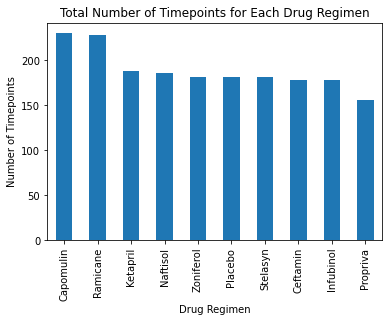

In [459]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
grouped_drug = final_df.groupby("Drug Regimen")
plotable_data = grouped_drug["Timepoint"].count()
plotable_data.sort_values(ascending=False, inplace=True)
plotable_data.plot(kind='bar')
plt.title('Total Number of Timepoints for Each Drug Regimen')
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Timepoints')
plt.show()

In [460]:
plotable_data

Drug Regimen
Capomulin    230
Ramicane     228
Ketapril     188
Naftisol     186
Zoniferol    182
Placebo      181
Stelasyn     181
Ceftamin     178
Infubinol    178
Propriva     156
Name: Timepoint, dtype: int64

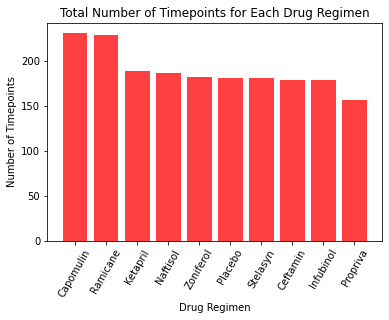

In [461]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
#bring in the ready df from last cell
#import numpy in first cell at very top as we need arrays for axises
#look at module 5.2 activity 1

#
x_axis = np.arange(len(grouped_drug))
tick_locations = []
for x in x_axis:
    tick_locations.append(x)

plt.bar(x_axis, plotable_data, facecolor="red", alpha=0.75, align="center")
#turn the 
x_markers = plotable_data.index.to_numpy()


plt.title("Total Number of Timepoints for Each Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Timepoints")
plt.xticks(tick_locations, x_markers)
plt.xticks(rotation=60)


plt.show()

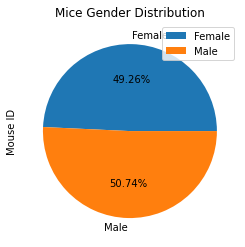

In [462]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
mice_gender_count = final_df.groupby(["Sex"]).count()
labels =["Male", "Female"]
mice_gender_count.plot(kind="pie", y="Mouse ID", title="Mice Gender Distribution", legend=True, autopct='%.2f%%')


No handles with labels found to put in legend.


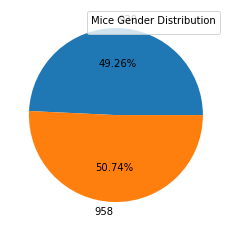

In [463]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
#make an array for mice sex
sex_array = mice_gender_count["Mouse ID"].values
lbl = mice_gender_count["Mouse ID"]
plt.legend(title='Mice Gender Distribution', loc='best')
labels = final_df['Sex']
plt.pie(sex_array, labels=lbl, autopct='%1.2f%%')
plt.show()

## Quartiles, Outliers and Boxplots

In [464]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
largest_tumor = final_df.groupby(["Mouse ID"]).max()["Timepoint"].reset_index()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
merged_df = pd.merge(largest_tumor, final_df, on=["Mouse ID", "Timepoint"])
merged_df
#filter for the drugs mentioned above
#would not filter correctly with &, so used | instead
filter_drugs_df = merged_df.loc[(merged_df["Drug Regimen"] == "Ramicane") |
                              (merged_df["Drug Regimen"] == "Capomulin") |
                              (merged_df["Drug Regimen"] == "Infubinol") |
                              (merged_df["Drug Regimen"] == "Ceftamin")]
filter_drugs_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
3,a275,45,62.999356,3,Ceftamin,Female,20,28
6,a411,45,38.407618,1,Ramicane,Male,3,22
7,a444,45,43.047543,0,Ramicane,Female,10,25


In [465]:
# Put treatments into a list for for loop (and later for plot labels)
#look at module 5.3 activity 2 for reference
treatments_lst = list(filter_drugs_df["Drug Regimen"].unique())
# Create empty list to fill with tumor vol data (for plotting)

tumor_volume = []
# Calculate the IQR and quantitatively determine if there are any potential outliers.
# Locate the rows which contain mice on each drug and get the tumor volumes
# add subset 
for i in treatments_lst:
    tvol=filter_drugs_df.loc[filter_drugs_df['Drug Regimen']==i,"Tumor Volume (mm3)"]
    #the line of code below was originally in place in for loop
    #tvol=filter_drugs_df.loc[filter_drugs_df['Drug Regimen']==i,"Tumor Volume (mm3)"]

    tumor_volume.append(tvol)

    treats = filter_drugs_df[filter_drugs_df["Drug Regimen"]==i]    
    quartiles = treats["Tumor Volume (mm3)"].quantile([.25, .5, .75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    # Determine outliers using upper and lower bounds
    outliar = tvol.loc[(tvol > upper_bound) | (tvol < lower_bound)]

    
    print(f"The potential outliers for {i}'s Tumor Volumes in this experiement were {outliar}")

The potential outliers for Infubinol's Tumor Volumes in this experiement were 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
The potential outliers for Ceftamin's Tumor Volumes in this experiement were Series([], Name: Tumor Volume (mm3), dtype: float64)
The potential outliers for Ramicane's Tumor Volumes in this experiement were Series([], Name: Tumor Volume (mm3), dtype: float64)
The potential outliers for Capomulin's Tumor Volumes in this experiement were Series([], Name: Tumor Volume (mm3), dtype: float64)


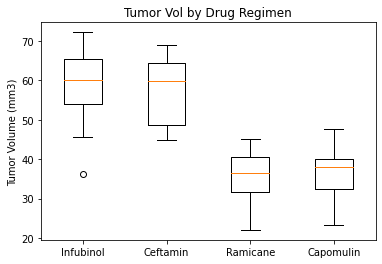

In [466]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
#look at module 5.3 lesson 2 for reference
fig1, ax1 = plt.subplots()
ax1.set_title('Tumor Vol by Drug Regimen')
ax1.set_ylabel('Tumor Volume (mm3)')
ax1.boxplot(tumor_volume, labels=treatments_lst)
plt.show()



## Line and Scatter Plots

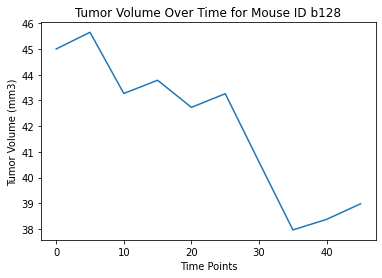

In [467]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
#looking at df Mouse ID b128 is my choice
x_time = final_df.loc[final_df["Mouse ID"] == "b128", "Timepoint"]

y_vol = final_df.loc[final_df["Mouse ID"] == "b128", "Tumor Volume (mm3)"]

plt.plot(x_time, y_vol)
plt.xlabel("Time Points")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Tumor Volume Over Time for Mouse ID b128")
plt.show()

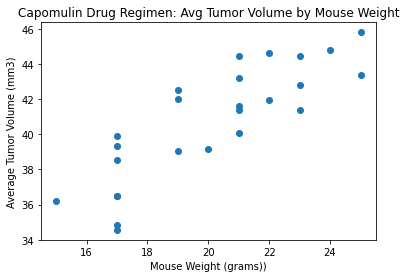

In [468]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
cap_df = final_df[final_df['Drug Regimen'] == 'Capomulin']
data_plot = cap_df.groupby(["Mouse ID"]).mean()
#mouse weight we can avg as it doesnt change in data set anyway
x_plot = data_plot["Weight (g)"]
y_plot = data_plot["Tumor Volume (mm3)"]
plt.scatter(x_plot, y_plot)
plt.xlabel("Mouse Weight (grams))")
plt.ylabel("Average Tumor Volume (mm3)")
plt.title("Capomulin Drug Regimen: Avg Tumor Volume by Mouse Weight")
plt.show()




## Correlation and Regression

The correlation coefficient for this chart is 0.8419363424694721


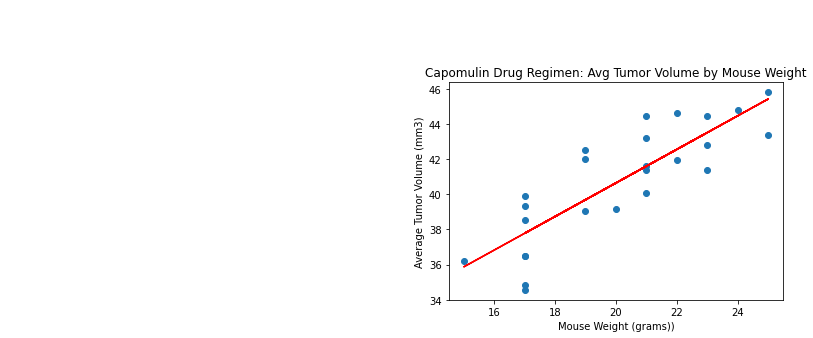

In [469]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
#refer to module 5.3 lesson 8
from scipy.stats import linregress
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_plot, y_plot)
regress_values = x_plot * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_plot,y_plot)
plt.plot(x_plot,regress_values,"r-")

plt.annotate(line_eq,(0,50),fontsize=15,color="red")
plt.xlabel("Mouse Weight (grams))")
plt.ylabel("Average Tumor Volume (mm3)")
plt.title("Capomulin Drug Regimen: Avg Tumor Volume by Mouse Weight")
print(f"The correlation coefficient for this chart is {rvalue}")
plt.show()
